In [132]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch
import torch.optim
# CODE FILES HERE
from solver import Solver
from vae import Encoder, Decoder, Vae
from dataloader import DataLoader

%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [145]:
# 2 layer networks for encoder and decoder
learning_rate = 1e-3
batch_size = 128
optimizer = torch.optim.Adam
epochs = 6 #0000
num_normal_plots = 2

dataset = "LFW"
input_dim = 0
hidden_dim = 0
z_dim = 0
img_dim = 0
if dataset == "MNIST" or "EMNIST":
    img_dim_x = 28
    img_dim_y = 28
    input_dim = 784
    hidden_dim = 500 # Kingma, Welling use 500 neurons, otherwise use 400
    z_dim = 20 # 1000 is suggested in the paper "Tutorial on VAE" but Kingma, Welling show 20 is sufficient for MNIST
elif dataset == "LFW":
    img_dim_x = None # TODO
    img_dim_y = None # TODO
    input_dim = None #TODO
    hidden_dim = None # TODO
    z_dim = None # TODO

In [146]:
data_loader = DataLoader(batch_size, dataset, z_dim)
encoder = Encoder(input_dim, hidden_dim, z_dim)
decoder = Decoder(z_dim, hidden_dim, input_dim)

Total dataset size:
n_samples: 1288
n_features: 5550
n_classes: 7
img dims x: 50 y: 37 c: 3
(1030, 5550)
torch.Size([1, 1030, 5550])


In [5]:
solver = Solver(data_loader, encoder, decoder, optimizer, z_dim, (img_dim), epochs, num_normal_plots, batch_size, learning_rate)
solver.run()

+++++ START RUN +++++
====> Epoch: 1 train set loss avg: 160.1435
====> Test set loss avg: 147.0037
34.96687626838684 seconds for epoch 1
====> Epoch: 2 train set loss avg: 119.6217
====> Test set loss avg: 147.6570
37.70004725456238 seconds for epoch 2
====> Epoch: 3 train set loss avg: 113.2547
====> Test set loss avg: 149.2499
47.4258451461792 seconds for epoch 3
====> Epoch: 4 train set loss avg: 110.4976
====> Test set loss avg: 152.0359
52.469255685806274 seconds for epoch 4
====> Epoch: 5 train set loss avg: 108.8754
====> Test set loss avg: 153.3355
47.523306369781494 seconds for epoch 5
====> Epoch: 6 train set loss avg: 107.8345
====> Test set loss avg: 153.3230
44.879966020584106 seconds for epoch 6
+++++ RUN IS FINISHED +++++


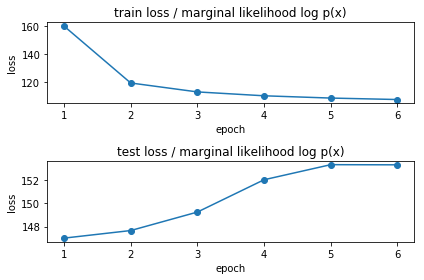

In [8]:
# Plotting train and test losses for all epochs
xaxis = np.arange(1, epochs+1)
train_losses = list(list(zip(*solver.train_loss_history))[1])
# Plotting the train loss
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, len(solver.train_loss_history)+1), train_losses, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("train loss / marginal likelihood log p(x)")
#plt.legend(['train loss'], loc='upper right')
plt.xticks(xaxis)

# Plotting the test loss
plt.subplot(2, 1, 2)
plt.plot(np.arange(1, len(solver.test_loss_history)+1), solver.test_loss_history, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("test loss / marginal likelihood log p(x)")
#plt.legend(['test loss'], loc='upper right')
plt.xticks(xaxis)

plt.tight_layout()
plt.show()

epoch: 3, mu(z): -0.0032660895168349006, stddev(z): 1.0835758719617115, var(z): 1.1741366702975833, var(\mu(z)): 0.00012553219858091325
epoch: 6, mu(z): 0.0005852110150430272, stddev(z): 1.0400605122926139, var(z): 1.0817258692303744, var(\mu(z)): 0.00010972135351039469


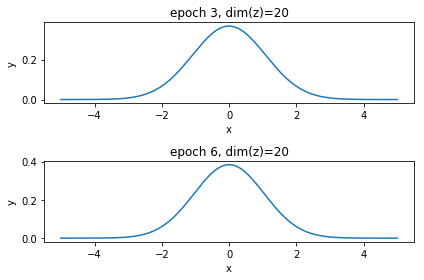

In [9]:
# Plotting histogram of the latent space, given the computed \mu and \sigma
# TODO: Compute the Var(\mu(z))
x = np.linspace(-5, 5, 5000)
plot_cols = np.arange(1, num_normal_plots+1)
for idx, stats in enumerate(solver.z_stats):
    epoch, mu, std, muz = stats
    print("epoch: {}, mu(z): {}, stddev(z): {}, var(z): {}, var(\mu(z)): {}".format(\
        epoch, mu, std, np.power(std, 2), torch.var(muz).item()))
    y = (1 / (np.sqrt(2 * np.pi * np.power(std, 2)))) * \
        (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(std, 2)))))
    plt.subplot(2, 1, plot_cols[idx])
    plt.plot(x, y)
    plt.title("epoch {}, dim(z)={}".format(epoch, z_dim))
    plt.xlabel("x")
    plt.ylabel("y")

plt.tight_layout()
plt.show()

epoch: 1, train_loss: 160.14348, test_loss: 147.00365, recon. loss: 144.32104, KL div.: 15.82243
overfitting: 13.13982
epoch: 2, train_loss: 119.62167, test_loss: 147.65700, recon. loss: 96.92160, KL div.: 22.70002
overfitting: 28.03533
epoch: 3, train_loss: 113.25466, test_loss: 149.24990, recon. loss: 88.98756, KL div.: 24.26712
overfitting: 35.99524
epoch: 4, train_loss: 110.49759, test_loss: 152.03590, recon. loss: 85.70016, KL div.: 24.79745
overfitting: 41.53831
epoch: 5, train_loss: 108.87545, test_loss: 153.33546, recon. loss: 83.82892, KL div.: 25.04654
overfitting: 44.46001
epoch: 6, train_loss: 107.83446, test_loss: 153.32295, recon. loss: 82.60287, KL div.: 25.23160
overfitting: 45.48850


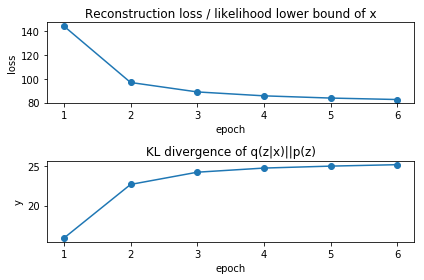

In [17]:
# Monitoring the reconstruction loss (likelihood lower bound) and KL divergence
rls = list(list(zip(*solver.train_loss_history))[2])
kls = list(list(zip(*solver.train_loss_history))[3])
for ((epoch, train_loss, rl, kl), test_loss) in zip(solver.train_loss_history, solver.test_loss_history):
    print("epoch: {}, train_loss: {:.5f}, test_loss: {:.5f}, recon. loss: {:.5f}, KL div.: {:.5f}".format(epoch, train_loss, test_loss, rl, kl))
    print("overfitting: {:.5f}".format(abs(test_loss-train_loss)))

plt.subplot(2, 1, 1)
plt.plot(np.arange(1, len(rls)+1), rls, '-o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Reconstruction loss / likelihood lower bound of x")
#plt.legend(['recon. loss'], loc='upper right')
plt.xticks(xaxis)

plt.subplot(2, 1, 2)
plt.plot(np.arange(1, len(kls)+1), kls, '-o')
plt.xlabel("epoch")
plt.ylabel("y")
plt.title("KL divergence of q(z|x)||p(z)")
#plt.legend(['KL div.'], loc='upper right')
plt.xticks(xaxis)

plt.tight_layout()
plt.show()

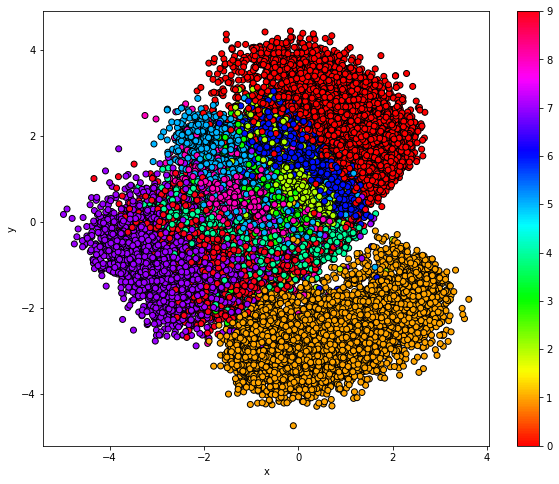

In [14]:
# visualize q(z|x) (latent space z)
if solver.z_dim == 2:
    labels = solver.labels.tolist()
    plt.figure(figsize=(10,8))
    plt.scatter(solver.latent_space[:,0], solver.latent_space[:,1], c=labels, edgecolors='black', cmap='hsv')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar() # show color scale
else:
    print("Plot of latent space not possible as dimension of z is not 2")

Total dataset size:
n_samples: 1288
n_features: 5550
n_classes: 7
img dims x: 50 y: 37 c: 3


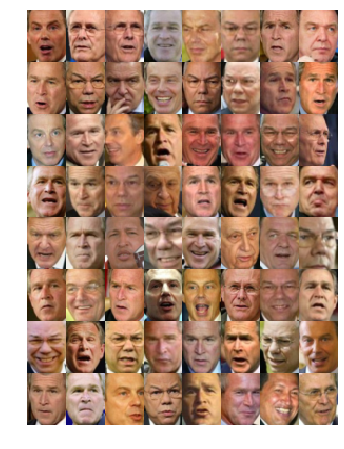

In [131]:
def plot_gallery(images, h, w, c, n_row=8, n_col=8):
    gs = gridspec.GridSpec(n_row, n_col)
    # set the space between subplots and the position of the subplots in the figure
    gs.update(wspace=0.0, hspace=0.0, left = 0.1, right = 0.4, bottom = 0.1, top = 0.4) # adjust right and top for size
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    #plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i, g in enumerate(gs): # range(n_row * n_col):
        plt.subplot(g) #n_row, n_col, i + 1)
        image = images[i].reshape((h, w, c)).astype(int)
        plt.imshow(image) # , cmap=plt.cm.gray
        plt.axis("off")
        plt.tight_layout()
        
plot_gallery(X_train, h, w, c)